# Group M - Solar Potential ML
## Members:
### 21030062 - Eimantas Miliauskis
### - Harvey
### - Yasine

In [43]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, classification_report
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sn

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, classification_report

In [29]:
readfile = pd.read_excel("solar-potential.xlsx", usecols=["Insolation", "Generation","Area"], nrows=10000)
print(f"# num values:\n{readfile.isnull().sum()}\n")
X = readfile[["Insolation", "Area"]].copy()
y = readfile["Generation"].copy()
print(X.head(), end="\n\n")
print(y.head())
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.19)
min_max_scalar = preprocessing.MinMaxScaler()
X = min_max_scalar.fit_transform(X)
# y = min_max_scalar.fit_transform(y)

# num values:
Insolation    0
Area          0
Generation    0
dtype: int64

   Insolation     Area
0   1027.9546  34.6873
1    973.5484  29.1889
2   1007.9615  24.1928
3    984.3519  55.2254
4   1022.1143  32.5077

0    3209.1230
1    2557.5083
2    2194.6885
3    4892.5117
4    2990.3904
Name: Generation, dtype: float64


In [14]:
rfc = RandomForestClassifier(n_estimators=50, max_features="sqrt", max_samples=None)

# Fit RFC and predict using the testing set
rfc.fit(train_x, train_y)
pred2 = rfc.predict(test_x)

# Performance Report of rfc
print(f"Accuracy Score of Random Forest Classifier: {accuracy_score(pred2,test_y)*100}%")
cm = confusion_matrix(test_y, pred2, labels = rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
# rfc_disp = RocCurveDisplay.from_estimator(rfc, test_x, test_y, ax=ax1)
# prec, recall, _ = precision_recall_curve(test_y, pred2, pos_label=rfc.classes_[1])
# pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

print(classification_report(test_y, pred2, target_names=["suitable", "well suitable", "excellent suitable"]))


ValueError: Unknown label type: 'continuous'

In [25]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, degree=3, epsilon=20))
regr.fit(train_x, train_y)
pred3 = regr.predict(test_x)
print(regr.score(train_x,train_y))


-0.002955110755865631


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

logmodel = LinearRegression()

pipe = make_pipeline(StandardScaler(), logmodel)
pipe.fit(train_x,train_y)  # apply the pipeline on training data
print(pipe.score(test_x,test_y))



0.9988172051509111


Insolation max:1128.9/min:889.2667
Area max:45234.9489/min:10.0
Generation max:4201077.5/min:815.226


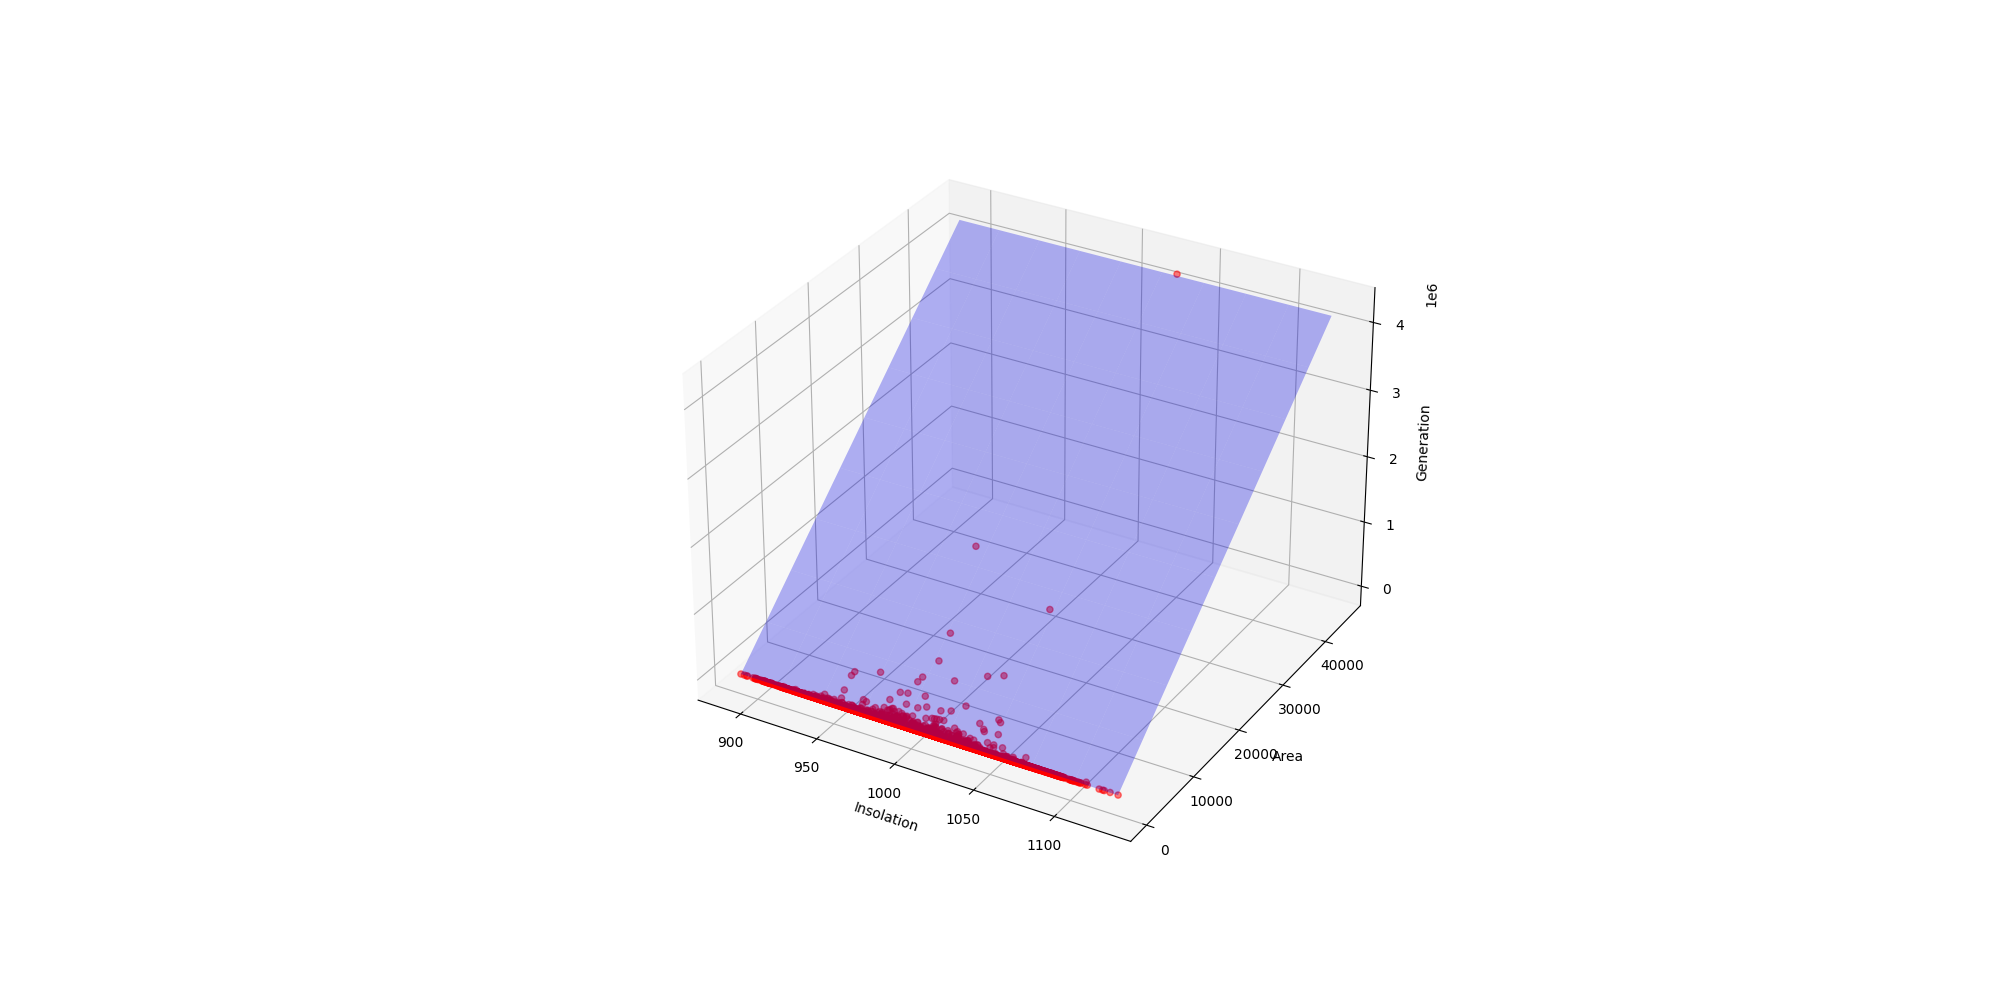

In [44]:
x_surf, y_surf = np.meshgrid(np.linspace(readfile.Insolation.min(), readfile.Insolation.max(), 10), np.linspace(readfile.Area.min(), readfile.Area.max(), 10))
onlyX = pd.DataFrame({'Insolation':x_surf.ravel(), 'Area':y_surf.ravel()})
fittedY=pipe.predict(onlyX)
fittedY=np.array(fittedY)

print(f"Insolation max:{readfile.Insolation.max()}/min:{readfile.Insolation.min()}")
print(f"Area max:{readfile.Area.max()}/min:{readfile.Area.min()}")
print(f"Generation max:{readfile.Generation.max()}/min:{readfile.Generation.min()}")

# readfile["Generation"].plot.line()

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(readfile['Insolation'],readfile['Area'],readfile['Generation'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Insolation')
ax.set_ylabel('Area')
ax.set_zlabel('Generation')
plt.show()